# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 *meters per second* of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import gmaps

# Import API key
from api_keys import api_key
from api_keys import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

date = datetime.date.today()
print("Beginning Data Retrieval")
print("-" * 30)
set = 1
count = 1
for city in cities:
    try:
        print(f"Processing Record {count} | {city}")
        query_url = base_url + "appid=" + "c1b578bf70885edbf5374805c17dd61b" + "&units=" + units + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        #Append results to the empty lists
        city_name.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
#         date.append(datetime.datetime.now())
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        count += 1
    except KeyError:
        print("City not found. Skipping...")
print("-"*30)
print("Data Retrieval Complete")



Beginning Data Retrieval
------------------------------
Processing Record 1 | punta arenas
Processing Record 2 | yanan
City not found. Skipping...
Processing Record 2 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 | yerbogachen
Processing Record 3 | saskylakh
Processing Record 4 | ornskoldsvik
Processing Record 5 | maceio
Processing Record 6 | airai
Processing Record 7 | ruatoria
City not found. Skipping...
Processing Record 7 | busselton
Processing Record 8 | hobart
Processing Record 9 | bluff
Processing Record 10 | atuona
Processing Record 11 | brae
Processing Record 12 | albany
Processing Record 13 | malwan
City not found. Skipping...
Processing Record 13 | rikitea
Processing Record 14 | paradwip
City not found. Skipping...
Processing Record 14 | barrow
Processing Record 15 | otane
Processing Record 16 | qaanaaq
Processing Record 17 | padang
Processing Record 18 | nizhneyansk
City not found. Skipping...
Processing Record 18 | hamilton
Processing Record 19 | aksu


Processing Record 212 | pryazha
Processing Record 213 | bathsheba
Processing Record 214 | pangody
Processing Record 215 | troitsko-pechorsk
Processing Record 216 | hurbanovo
Processing Record 217 | torbay
Processing Record 218 | brewster
Processing Record 219 | souillac
Processing Record 220 | ekibastuz
Processing Record 221 | mackay
Processing Record 222 | ust-tsilma
Processing Record 223 | cairns
Processing Record 224 | abu zabad
Processing Record 225 | bayonet point
Processing Record 226 | lerwick
Processing Record 227 | chuy
Processing Record 228 | moju
Processing Record 229 | kamenka
Processing Record 230 | karamea
City not found. Skipping...
Processing Record 230 | kavieng
Processing Record 231 | severomorsk
Processing Record 232 | port elizabeth
Processing Record 233 | rawson
Processing Record 234 | berlevag
Processing Record 235 | toliary
City not found. Skipping...
Processing Record 235 | new ipswich
Processing Record 236 | pevek
Processing Record 237 | buin
Processing Record 

Processing Record 413 | katobu
Processing Record 414 | rock sound
Processing Record 415 | valdivia
Processing Record 416 | sambava
Processing Record 417 | sipoo
Processing Record 418 | catamarca
City not found. Skipping...
Processing Record 418 | ambilobe
Processing Record 419 | goure
Processing Record 420 | iqaluit
Processing Record 421 | salekhard
Processing Record 422 | roma
Processing Record 423 | tuy hoa
Processing Record 424 | mao
Processing Record 425 | biak
Processing Record 426 | nome
Processing Record 427 | port macquarie
Processing Record 428 | ola
Processing Record 429 | behbahan
Processing Record 430 | kushmurun
City not found. Skipping...
Processing Record 430 | surgut
Processing Record 431 | hinesville
Processing Record 432 | sao miguel do oeste
City not found. Skipping...
Processing Record 432 | caravelas
Processing Record 433 | chupa
Processing Record 434 | fevralsk
City not found. Skipping...
Processing Record 434 | tocopilla
Processing Record 435 | urucui
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Build dataframe incorporating all variables
cities_df = pd.DataFrame({'City': city_name,
                          'Cloudiness': cloudiness,
                          'Country': country,
                          'Date': date,
                          'Humidity': humidity,
                          'Latitude': lat,
                          'Longitude': lng,
                          'Max Temp': max_temp,
                          'Wind Speed': wind_speed
                         })
cities_df.head()

#Export cities data to .csv
cities_df.to_csv("city_data.csv", encoding="utf-8", index=False)

In [5]:
#Check for missing data
cities_df.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Latitude      560
Longitude     560
Max Temp      560
Wind Speed    560
dtype: int64

In [6]:
#Review dataframe structure
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Punta Arenas,20,CL,2019-02-05,53,-53.16,-70.91,51.80,18.34
1,Yerbogachen,44,RU,2019-02-05,56,61.28,108.01,-19.72,2.80
2,Saskylakh,68,RU,2019-02-05,78,71.97,114.09,2.25,24.05
3,Ornskoldsvik,0,SE,2019-02-05,76,63.29,18.72,-5.81,2.24
4,Maceio,20,BR,2019-02-05,94,-9.67,-35.74,77.00,6.93


#### Hemisphere Breakdown

In [7]:
north = sum(i>0 for i in cities_df['Latitude'])
south = sum(i<0 for i in cities_df['Latitude'])
total_cities = north + south


print(f"Of the {total_cities} cities in the above list, {north} are located in the northern hemisphere, and {south} are in the southern hemisphere.")

Of the 560 cities in the above list, 384 are located in the northern hemisphere, and 176 are in the southern hemisphere.


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

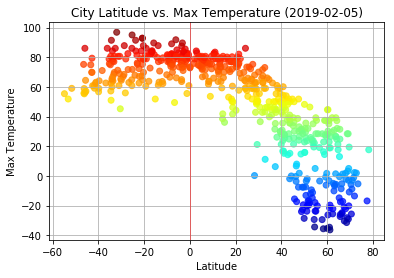

In [8]:
#Build plot
plt.scatter(lat, max_temp, marker="o", c=max_temp, cmap="jet", alpha=0.75)

#Emphasize equator with a red line
plt.axvline(x=0,color="red", linewidth=0.5)

#Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid(True)
plt.show

#Export to png
plt.savefig("Images/max_temp_bubble_plot.png", bbox_inches="tight")

## Observation 1:
We can see as the data points move away from the equator (0 deg. latitude, emphasized here in red) they trend to cooler temperatures. 

## Observation 2:
While there are significantly more data points represented in the northern hemisphere ({north}) than the southern ({south}), we can also see a much more diverse range of temperatures. 

## Observation 3: 
This observation is dependant on the time that the data was pulled. 
Despite it being different seasons in the northern and southern hemispheres due to axial tilt, the max temperatures within 20 degrees of the equator are about the same. It would be valuable to see if that trend is still true in six months when the southern hemisphere is in winter, and the northern is in summer. 

#### Latitude vs. Humidity Plot

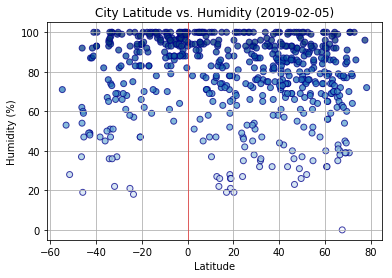

In [9]:
#Build plot
plt.scatter(lat, humidity, marker="o", c=humidity, cmap="Blues", edgecolors="darkblue", alpha=0.75)

#Emphasize equator with a red line
plt.axvline(x=0,color="red", linewidth=0.5)

#Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(True)

#Export to png
plt.savefig("Images/humidity_scatter_plot.png", bbox_inches="tight")

## Observation 3:
Humidity does not seem to correlate to distance from the equator.

There also does not seem to be a significant difference between levels of humidity when comparing northern and southern hemispheres -- though the least humid spots are in the northern hemisphere, with the 0% humidity cities above 60 degrees in latitude.

#### Latitude vs. Cloudiness Plot

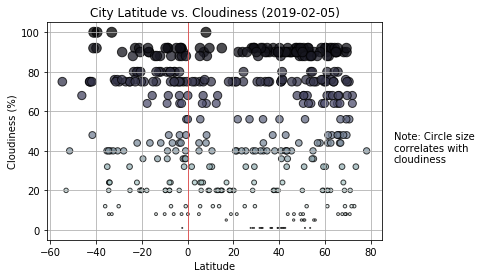

In [10]:
#Build plot
plt.scatter(lat, cloudiness, marker="o", c=cloudiness, s=cloudiness*5, cmap="bone_r", edgecolors="black", alpha=0.75)

#Emphasize equator with a red line
plt.axvline(x=0,color="red", linewidth=0.5)

#Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True)


# Incorporate a text label regarding circle size
plt.text(90,50, "Note: Circle size \ncorrelates with \ncloudiness", ha="left", va="top")

# Export to png
plt.savefig("Images/cloudiness_bubble_plot.png", bbox_inches="tight")

#### Latitude vs. Wind Speed Plot

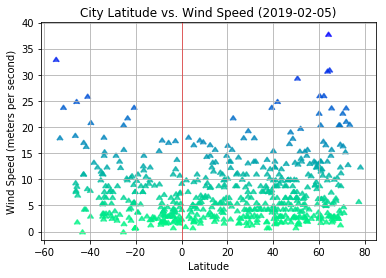

In [11]:
#Build plot
plt.scatter(lat, wind_speed, marker=6, c=wind_speed, cmap="winter_r", alpha=0.75)

#Emphasize equator with a red line
plt.axvline(x=0,color="red", linewidth=0.5)

#Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meters per second)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True)

# plt.savefig("Images/wind_speed_plot.png", bbox_inches="tight")

## Heatmap of Humidity in the list of randomly selected cities

In [12]:
#Set locations and data type
gmaps.configure(api_key='gkey')
locations = cities_df[['Latitude', 'Longitude']].astype(float)
humid = cities_df['Humidity'].astype(float)

#Set auto-zoom of map
center=(0.0,0.0)
fig = gmaps.figure(center=center, zoom_level=1)

#Build & apply heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=humid, dissipating=False, max_intensity=100, point_radius=4)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

## Heatmap of Cloudiness in the list of randomly selected cities

In [13]:
#Set locations and data type
locations = cities_df[['Latitude', 'Longitude']].astype(float)
clouds = cities_df['Cloudiness'].astype(float)

#Set auto-zoom of map
center=(0.0,0.0)
fig = gmaps.figure(center=center, zoom_level=1)

#Build & apply heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=50, point_radius=4)
heat_layer.gradient = [(0,0,0,0),  (192,192,192,1), (169,169,169,1),(128,128,128,.5),(105,105,105,1)]

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))